In [1]:
!pip3 install pywaffle

In [2]:
!pip3 install joypy

In [3]:
!pip3 install bubbly

In [4]:
# for some basic operations
import numpy as np 
import pandas as pd 
import random
import joypy
from collections import Counter

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from pandas import plotting
from pandas.plotting import parallel_coordinates

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
from bubbly.bubbly import bubbleplot

# for providing path
import os
print(os.listdir("../MarvelDC"))


['marvel-wikia-data.csv', '.DS_Store', 'BM.jpg', 'IM.jpg', 'GL.jpg', 'fivethirtyeight-comic-characters-dataset', 'MarvelDC.ipynb', '.ipynb_checkpoints', 'dc-wikia-data.csv']


In [5]:
# reading the data for dc

dc = pd.read_csv('../MarvelDC/dc-wikia-data.csv')

# checking the head of the data
dc.head()

page_id                         name                              urlslug  \
0     1422         Batman (Bruce Wayne)         \/wiki\/Batman_(Bruce_Wayne)   
1    23387        Superman (Clark Kent)        \/wiki\/Superman_(Clark_Kent)   
2     1458   Green Lantern (Hal Jordan)   \/wiki\/Green_Lantern_(Hal_Jordan)   
3     1659     James Gordon (New Earth)     \/wiki\/James_Gordon_(New_Earth)   
4     1576  Richard Grayson (New Earth)  \/wiki\/Richard_Grayson_(New_Earth)   

                ID            ALIGN         EYE        HAIR              SEX  \
0  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
1  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   
2  Secret Identity  Good Characters  Brown Eyes  Brown Hair  Male Characters   
3  Public Identity  Good Characters  Brown Eyes  White Hair  Male Characters   
4  Secret Identity  Good Characters   Blue Eyes  Black Hair  Male Characters   

   GSM              ALIVE  APPEARANCES FIRST APPEARANCE    YEAR  
0  NaN  Living Characters       3093.0        1939, May  1939.0  
1  NaN  Living Characters       2496.0    1986, October  1986.0  
2  NaN  Living Characters       1565.0    1959, October  1959.0  
3  NaN  Living Characters       1316.0   1987, February  1987.0  
4  NaN  Living Characters       1237.0      1940, April  1940.0

In [6]:
# reading the marvel data

marvel = pd.read_csv('../MarvelDC/marvel-wikia-data.csv')

# checking the head of the data
marvel.head()

page_id                                 name  \
0     1678            Spider-Man (Peter Parker)   
1     7139      Captain America (Steven Rogers)   
2    64786  Wolverine (James \"Logan\" Howlett)   
3     1868    Iron Man (Anthony \"Tony\" Stark)   
4     2460                  Thor (Thor Odinson)   

                                   urlslug                ID  \
0              \/Spider-Man_(Peter_Parker)   Secret Identity   
1        \/Captain_America_(Steven_Rogers)   Public Identity   
2  \/Wolverine_(James_%22Logan%22_Howlett)   Public Identity   
3    \/Iron_Man_(Anthony_%22Tony%22_Stark)   Public Identity   
4                    \/Thor_(Thor_Odinson)  No Dual Identity   

                ALIGN         EYE        HAIR              SEX  GSM  \
0     Good Characters  Hazel Eyes  Brown Hair  Male Characters  NaN   
1     Good Characters   Blue Eyes  White Hair  Male Characters  NaN   
2  Neutral Characters   Blue Eyes  Black Hair  Male Characters  NaN   
3     Good Characters   Blue Eyes  Black Hair  Male Characters  NaN   
4     Good Characters   Blue Eyes  Blond Hair  Male Characters  NaN   

               ALIVE  APPEARANCES FIRST APPEARANCE    Year  
0  Living Characters       4043.0           Aug-62  1962.0  
1  Living Characters       3360.0           Mar-41  1941.0  
2  Living Characters       3061.0           Oct-74  1974.0  
3  Living Characters       2961.0           Mar-63  1963.0  
4  Living Characters       2258.0           Nov-50  1950.0

In [7]:
# imputing missing values

dc['ID'] = dc['ID'].fillna(dc['ID'].mode()[0])
dc['ALIGN'] = dc['ALIGN'].fillna(dc['ALIGN'].mode()[0])
dc['EYE'].fillna(dc['EYE'].mode()[0], inplace = True)
dc['HAIR'].fillna(dc['HAIR'].mode()[0], inplace = True)
dc['SEX'].fillna(dc['SEX'].mode()[0], inplace = True)
dc['ALIVE'].fillna(dc['ALIVE'].mode()[0], inplace = True)
dc['APPEARANCES'].fillna(dc['APPEARANCES'].mode()[0], inplace = True)
dc['FIRST APPEARANCE'].fillna(dc['FIRST APPEARANCE'].mode()[0], inplace = True)
dc['YEAR'].fillna(dc['YEAR'].mode()[0], inplace = True)

marvel['ID'] = marvel['ID'].fillna(marvel['ID'].mode()[0])
marvel['ALIGN'] = marvel['ALIGN'].fillna(marvel['ALIGN'].mode()[0])
marvel['EYE'].fillna(marvel['EYE'].mode()[0], inplace = True)
marvel['HAIR'].fillna(marvel['HAIR'].mode()[0], inplace = True)
marvel['SEX'].fillna(marvel['SEX'].mode()[0], inplace = True)
marvel['ALIVE'].fillna(marvel['ALIVE'].mode()[0], inplace = True)
marvel['APPEARANCES'].fillna(marvel['APPEARANCES'].mode()[0], inplace = True)
marvel['FIRST APPEARANCE'].fillna(marvel['FIRST APPEARANCE'].mode()[0], inplace = True)
marvel['Year'].fillna(marvel['Year'].mode()[0], inplace = True)

In [8]:
import warnings
warnings.filterwarnings('ignore')

dc['YEAR'] = dc['YEAR'].astype(int)
dc['APPEARANCES'] = dc['APPEARANCES'].astype(int)

figure = bubbleplot(dataset = marvel, x_column = 'APPEARANCES', y_column = 'Year', 
    bubble_column = 'ALIGN',size_column = 'APPEARANCES', color_column = 'ALIGN',
    y_title = "Appearances", x_title = "Year", title = 'Year VS ALIGNMENT VS APPEARANCES',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

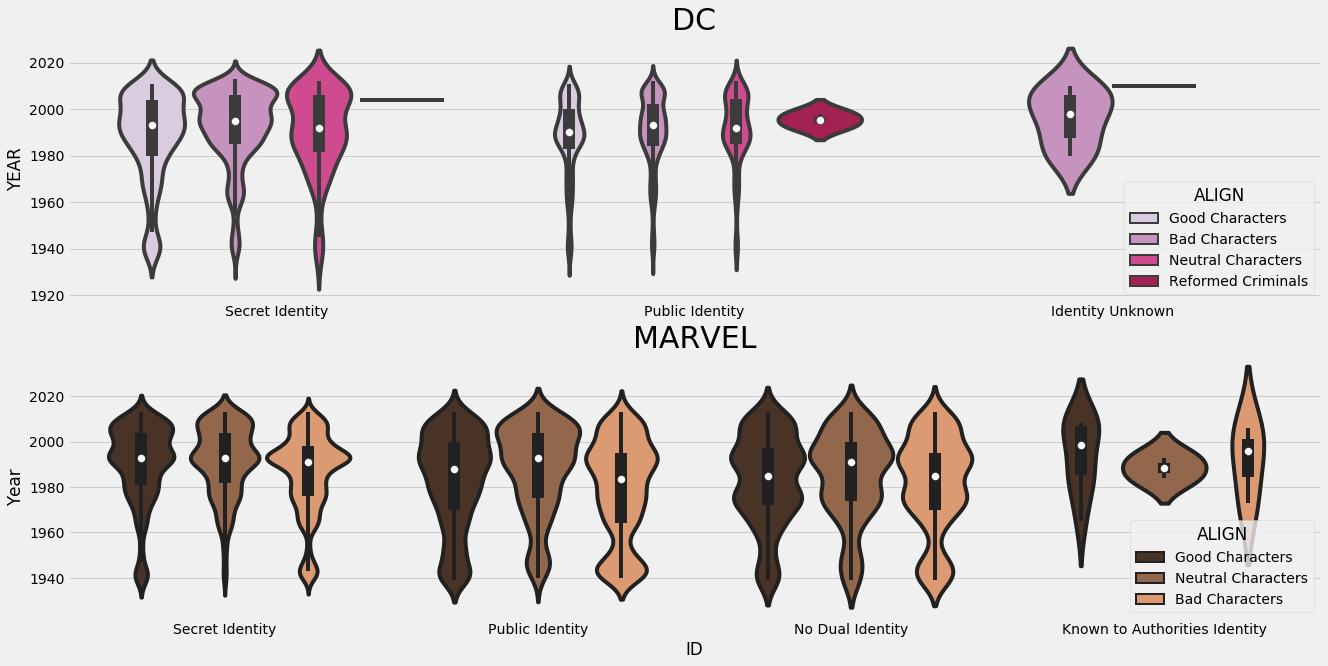

In [9]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

plt.subplot(2, 1, 1)
sns.violinplot(dc['ID'], dc['YEAR'], hue = dc['ALIGN'], palette = 'PuRd')
plt.xlabel(' ')
plt.title('DC', fontsize = 30)

plt.subplot(2, 1, 2)
sns.violinplot(marvel['ID'], marvel['Year'], hue = marvel['ALIGN'], palette = 'copper')
plt.title('MARVEL', fontsize = 30)

plt.show()

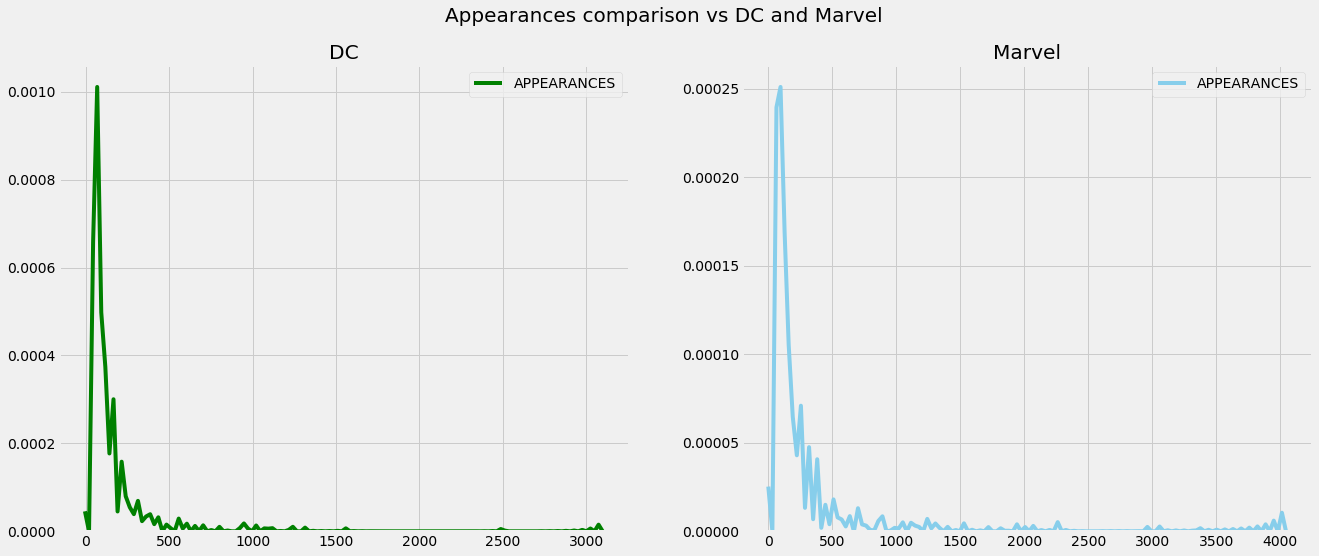

In [10]:
plt.rcParams['figure.figsize'] = (20, 8)
plt.style.use('fivethirtyeight')

dc['APPEARANCES'].fillna(0, inplace = True)
marvel['APPEARANCES'].fillna(0, inplace = True)

import warnings
warnings.filterwarnings('ignore')

plt.subplot(1, 2, 1)
sns.kdeplot(dc['APPEARANCES'], color = 'green')
plt.title('DC')

plt.subplot(1, 2, 2)
sns.kdeplot(marvel['APPEARANCES'], color = 'skyblue')
plt.title('Marvel')

plt.suptitle('Appearances comparison vs DC and Marvel', fontsize = 20)
plt.show()

In [11]:
trace1 = go.Histogram(
         x = dc['ID'],
         name = 'DC',
         opacity = 0.75,
         marker = dict(
               color = 'rgb(52, 85, 159, 0.6)'
         )
)
trace2 = go.Histogram(
          x = marvel['ID'],
          name = 'Marvel',
          opacity = 0.75,
          marker = dict(
                 color = 'rgb(84, 52, 15, 0.6)'
          )
)
data = [trace1, trace2]

layout = go.Layout(
    barmode = 'group',
    title = 'Comparison of Identities')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [12]:
trace1 = go.Scatter3d(
    x = dc['APPEARANCES'],
    y = dc['YEAR'],
    z = dc['ALIVE'],
    name = 'DC',
    mode='markers',
    marker=dict(
        size=10,
        color = 'rgb(58,56,72)',                # set color to an array/list of desired values      
    )
)

trace2 = go.Scatter3d(
    x = marvel['APPEARANCES'],
    y = marvel['Year'],
    z = marvel['ALIVE'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = 'rgb(217, 2, 8)'
    )
)

data = [trace1, trace2]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [13]:
trace = go.Box(
            x = dc['ALIGN'],
            y = dc['APPEARANCES'],
            name = 'DC',
            marker = dict(
                  color = 'rgb(145, 65, 75)')
)
                   

trace2 = go.Box(
            x = marvel['ALIGN'],
            y = marvel['APPEARANCES'],
            name = 'Marvel',
            marker = dict(
                   color = 'rgb(2, 15, 85)'),

              )

data = [trace, trace2]

layout = go.Layout(
    boxmode = 'group',
    title = 'Character vs Appearances')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [14]:
hair_dc = dc['HAIR'].value_counts()
hair_marvel = marvel['HAIR'].value_counts()

trace = go.Bar(
             x = hair_dc.index,
             y = hair_dc.values,
             name = 'DC',
             marker = dict(
                  color = 'rgb(56, 54, 36)'
             )
)
trace2 = go.Bar(
            x = hair_marvel.index,
            y = hair_marvel.values,
            name = 'Marvel',
            marker = dict(
                  color = 'rgb(78, 03, 45)'
            )
)

data = [trace, trace2]

layout = go.Layout(
             barmode = 'relative',
              title = 'Different Hair Colors of SuperHeroes')
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [15]:
hair_dc = dc['EYE'].value_counts()
hair_marvel = marvel['EYE'].value_counts()

trace = go.Bar(
             x = hair_dc.index,
             y = hair_dc.values,
             name = 'DC',
             marker = dict(
                  color = 'rgb(35, 25, 20)'
             )
)
trace2 = go.Bar(
            x = hair_marvel.index,
            y = hair_marvel.values,
            name = 'Marvel',
            marker = dict(
                  color = 'rgb(15, 25, 45)'
            )
)

data = [trace, trace2]

layout = go.Layout(
             barmode = 'relative',
              title = 'Different Eye Colors of SuperHeroes')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [16]:
gsm_dc = dc['GSM'].value_counts()
gsm_marvel = marvel['GSM'].value_counts()

label_dc = gsm_dc.index
size_dc = gsm_dc.values

label_marvel = gsm_marvel.index
size_marvel = gsm_marvel.values

colors = ['aqua', 'gold']

trace = go.Pie(
         labels = label_dc, values = size_dc, marker = dict(colors = colors), name = 'DC', hole = 0.3)
colors2 = ['pink', 'lightblue']

trace2 = go.Pie(labels = label_marvel, values = size_marvel, marker = dict(colors = colors2), name = 'Marvel', hole = 0.3)

data = [trace]
data2 = [trace2]

layout1 = go.Layout(title = 'Sexual Minority Groups in DC')
layout2 = go.Layout(title = 'Sexual Minority Groups in Marvel')

fig = go.Figure(data = data, layout = layout1)
fig2 = go.Figure(data = data2, layout = layout2)
py.iplot(fig)
py.iplot(fig2)

In [17]:
align_dc = dc['ALIGN'].value_counts()
align_marvel = marvel['ALIGN'].value_counts()

trace1 = go.Bar(
            x = align_dc.index,
            y = align_dc.values,
            name = 'DC',
            marker = dict(
                 color = 'rgb(78, 6, 2)'
            )
)
trace2 = go.Bar(
             x = align_marvel.index,
             y = align_marvel.values,
             name = 'Marvel',
             marker = dict(
                  color = 'rgb(05, 35, 20)'
             )
)
data = [trace1, trace2]

layout = go.Layout(
           barmode = 'group',
           title = 'Alignment of Characters')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'Alignment')

In [18]:
sex_count_dc = dc['SEX'].value_counts()
sex_count_marvel = marvel['SEX'].value_counts()

trace1 = go.Bar(
    x = sex_count_dc.index,
    y = sex_count_dc.values,
    name = 'DC',
    marker = dict(
        color = 'rgb(26,01,98)'
    )
)

trace2 = go.Bar(
     x = sex_count_marvel.index,
     y = sex_count_marvel.values,
     name = 'Marvel',
     marker = dict(
       color = 'rgb(104, 105, 120)' 
     )
)
data = [trace1, trace2]

layout = go.Layout(
            barmode = 'stack',
            title = 'Comparison of Gender in DC and Marvel')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'Gender')

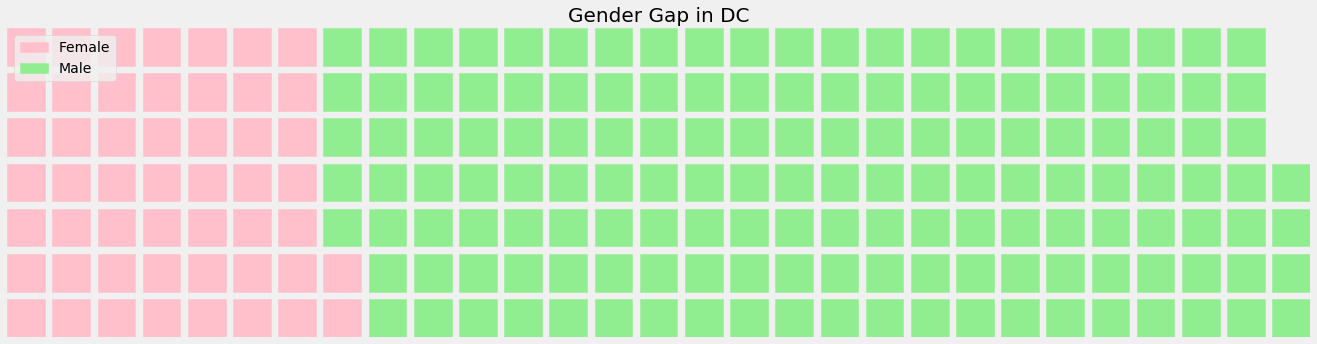

In [19]:
import warnings
warnings.filterwarnings('ignore')

# Prepare Data
df = dc.iloc[:200,:].groupby('SEX').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    values = df['counts'],
    labels = ['Female','Male'],
    legend = {'loc': 'upper left'},
    title = {'label': 'Gender Gap in DC', 'fontsize': 20},    
    rows=7,
    colors=['pink','lightgreen'],
    figsize = (20, 5)
)

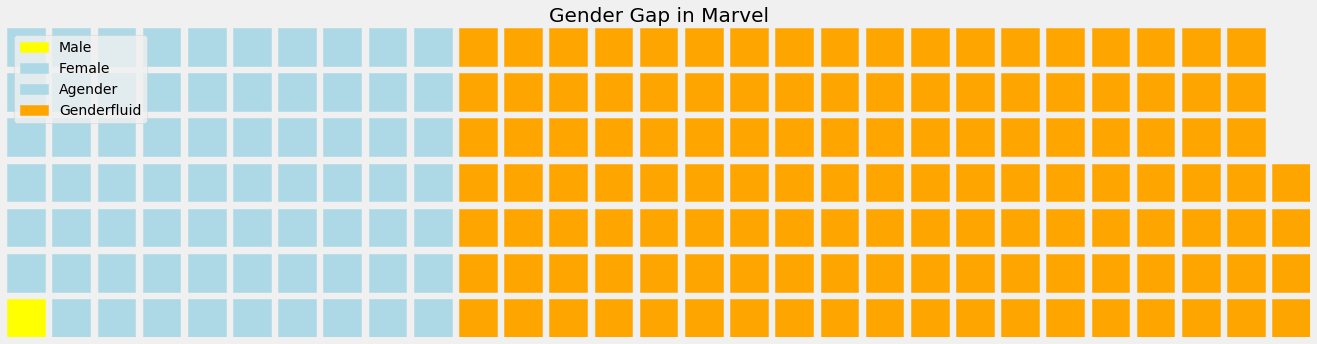

In [20]:
import warnings
warnings.filterwarnings('ignore')

# Prepare Data
df = marvel.iloc[:200,:].groupby('SEX').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    values = df['counts'],
    labels = ['Male','Female','Agender', 'Genderfluid'],
    legend = {'loc': 'upper left'},
    title = {'label': 'Gender Gap in Marvel', 'fontsize': 20},    
    rows=7,
    colors=['yellow','lightblue', 'lightblue','orange'],
    figsize = (20, 5)
)

In [21]:
dc_top = dc.iloc[dc.groupby(dc['ALIGN'])['APPEARANCES'].idxmax()][['name', 'ALIGN']]

dc_top

name               ALIGN
19   Alexander Luthor (New Earth)      Bad Characters
0            Batman (Bruce Wayne)     Good Characters
20         Roy Harper (New Earth)  Neutral Characters
387       Owen Mercer (New Earth)  Reformed Criminals

In [22]:
dc_alive = dc.iloc[dc.groupby(dc['ALIVE'])['APPEARANCES'].idxmax()][['name', 'ALIVE']]

dc_alive

name                ALIVE
11  Alan Scott (New Earth)  Deceased Characters
0     Batman (Bruce Wayne)    Living Characters

In [23]:
marvel_top = marvel.iloc[marvel.groupby(marvel['ALIGN'])['APPEARANCES'].idxmax()][['name', 'ALIGN']]

marvel_top

name               ALIGN
43          Victor von Doom (Earth-616)      Bad Characters
0             Spider-Man (Peter Parker)     Good Characters
2   Wolverine (James \"Logan\" Howlett)  Neutral Characters

In [24]:
marvel_alive = marvel.iloc[marvel.groupby(marvel['ALIVE'])['APPEARANCES'].idxmax()][['name', 'ALIVE']]

marvel_alive

name                ALIVE
21  Charles Xavier (Earth-616)  Deceased Characters
0    Spider-Man (Peter Parker)    Living Characters

In [25]:
dc['name'] = dc['name'].replace({'Earth':' ', 'earth':' '})

In [26]:
from PIL import Image
im = Image.open('../MarvelDC/BM.jpg')
d = np.array(im)

In [27]:
DC_DA = ' '.join(dc['name'].tolist())

In [28]:
DC_DAA = "".join(str(v) for v in DC_DA).lower()

Note: you may need to restart the kernel to use updated packages.


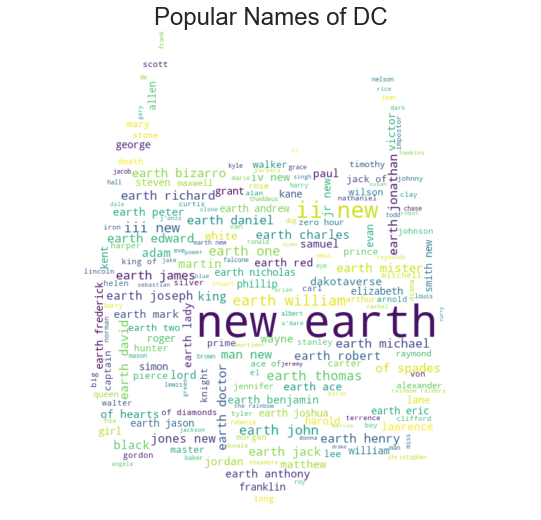

In [29]:
%pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(mask=d,background_color="white").generate(DC_DAA)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Popular Names of DC',size=24)
plt.show()

In [30]:
from PIL import Image

m = np.array(Image.open('../MarvelDC/IM.jpg'))

In [31]:
M_DA = ' '.join(marvel['name'].tolist())

In [32]:
M_DAA = "".join(str(v) for v in M_DA).lower()

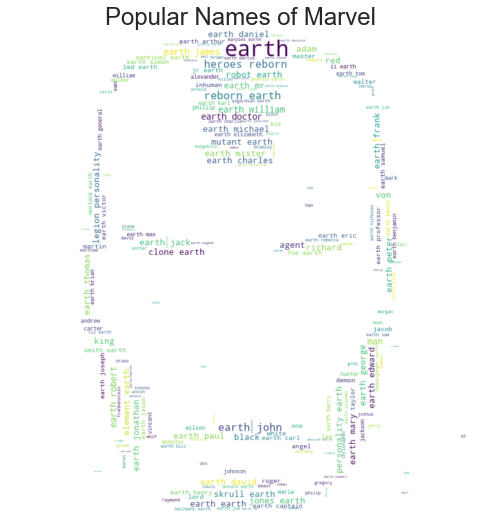

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(mask=m,background_color="white").generate(M_DAA)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Popular Names of Marvel',size=24)
plt.show()

In [34]:
marvel['comics'] = 'Marvel'
marvel = marvel.truncate(before=-1, after=15)
import networkx as nx
marvel = nx.from_pandas_edgelist(marvel, source='comics', target='name', edge_attr=True,)

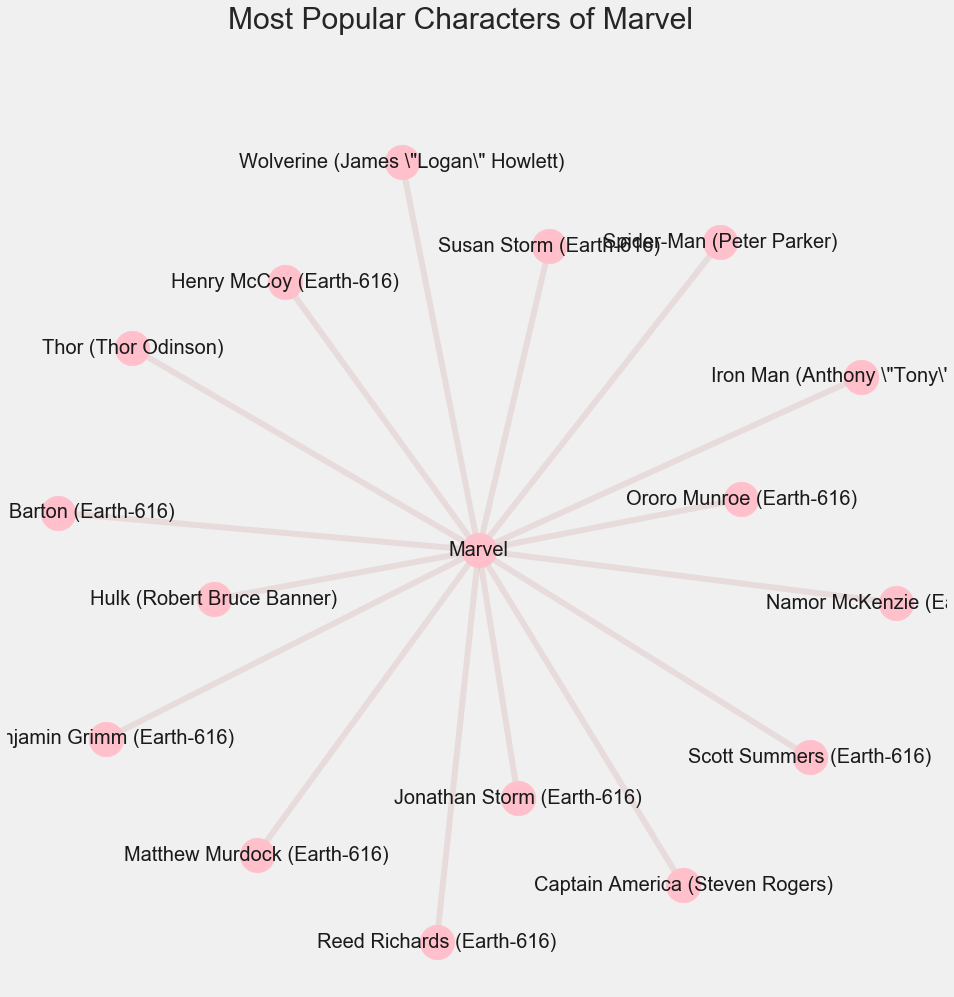

In [35]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']  = (15, 15)
plt.style.use('fivethirtyeight')
plt.suptitle('Most Popular Characters of Marvel', fontsize = 30)

pos = nx.spring_layout(marvel)

# drawing nodes
nx.draw_networkx_nodes(marvel, pos, node_size = 1200, node_color = 'pink')

# drawing edges
nx.draw_networkx_edges(marvel, pos, width = 6, alpha = 0.1, edge_color = 'brown')

# labels
nx.draw_networkx_labels(marvel, pos, font_size = 20, font_family = 'sans-serif')

plt.grid()
plt.axis('off')
plt.show()

In [36]:
dc['comics']= 'DC'
dc= dc.truncate(before=-1, after=15)

import networkx as nx
dc = nx.from_pandas_edgelist(dc, source='comics', target='name', edge_attr=True,)

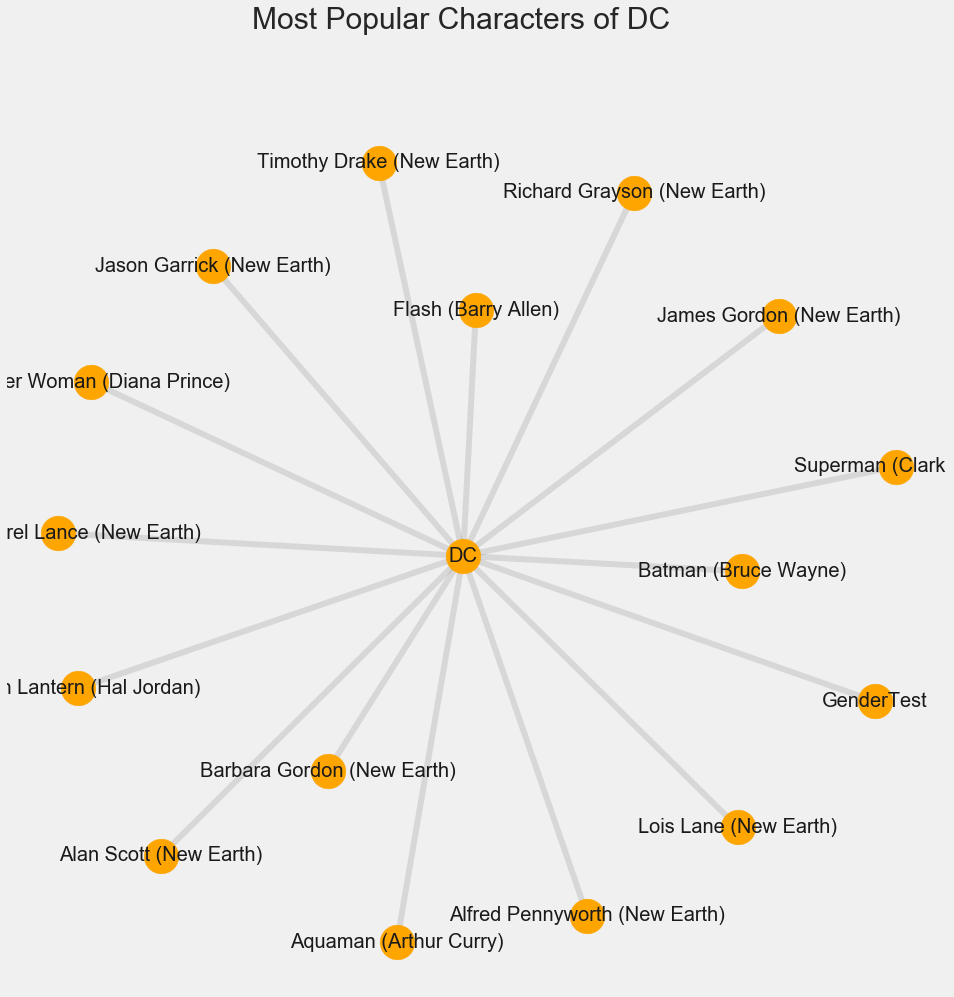

In [37]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']  = (15, 15)
plt.style.use('fivethirtyeight')
plt.suptitle('Most Popular Characters of DC', fontsize = 30)

pos = nx.spring_layout(dc)

# drawing nodes
nx.draw_networkx_nodes(dc, pos, node_size = 1200, node_color = 'orange')

# drawing edges
nx.draw_networkx_edges(dc, pos, width = 6, alpha = 0.1, edge_color = 'black')

# labels
nx.draw_networkx_labels(dc, pos, font_size = 20, font_family = 'sans-serif')

plt.grid()
plt.axis('off')
plt.show()
